In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
y = np.where(y == 0, -1, 1)

In [24]:
class MLP:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.learning_rate = learning_rate

    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.zeros((1, self.output_size))

  def relu(self, z):
      return np.maximum(0, z)

  def relu_derivative(self, z):
      return(z > 0).astype(float) # copiando array e convertendo para um tipo específico

  def sigmoid(self, z):
      return 1 / (1 + np.exp(-z)) # np.exp calcula o exponencial de cada valor do array "zV"

  def sigmoid_derivative(self, z):
      return self.sigmoid(z) * (1 - self.sigmoid(z))

  def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

  def cost(self, y_true, y_pred):
      return np.mean((y_true - y_pred)**2)

  def backward(self, X, y, output):
      m =X.shape[0]
      dZ2 = output - y
      dW2 = (1/m) * np.dot(self.a1.T, dZ2)
      db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

      dZ1 = np.dot(dZ2, self.W2.T) * self.relu_derivative(self.z1)
      dW1 = (1/m) * np.dot(X.T, dZ1)
      db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)


      self.W1 -= self.learning_rate * dW1
      self.b1 -= self.learning_rate * db1
      self.W2 -= self.learning_rate * dW2
      self.b2 -= self.learning_rate * db2

  def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                cost_value = self.cost(y, output)
                print(f'Época {epoch}, Custo: {cost_value.round(2)}')

  def predict(self, X):
        output = self.forward(X)
        return np.round(output)

input_size = X.shape[1]
hidden_size = 10
output_size = 1

mlp = MLP(input_size, hidden_size, output_size, learning_rate=0.01)
mlp.train(X, y.reshape(-1, 1), epochs=1000)

Época 0, Custo: 0.98
Época 100, Custo: 0.71
Época 200, Custo: 0.71
Época 300, Custo: 0.71
Época 400, Custo: 0.71
Época 500, Custo: 0.71
Época 600, Custo: 0.71
Época 700, Custo: 0.71
Época 800, Custo: 0.71
Época 900, Custo: 0.71


<ipython-input-24-da255ca557b7>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # np.exp calcula o exponencial de cada valor do array "zV"


<ipython-input-24-da255ca557b7>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # np.exp calcula o exponencial de cada valor do array "zV"


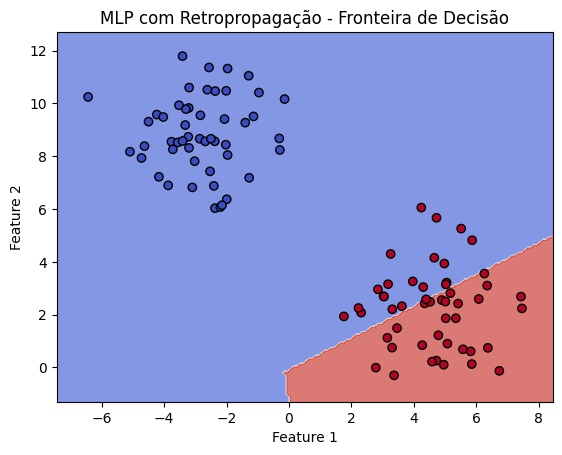

In [26]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.7, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title("MLP com Retropropagação - Fronteira de Decisão")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, mlp)
